# PLANTILLA PRESELECCIÓN DE VARIABLES

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

In [2]:
import fiser_tools
from fiser_tools import *

fiser_tools.misc.fis_light_theme()

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [3]:
ruta_proyecto = '../..'

Nombres de los ficheros de datos.

In [4]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [5]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

## MÉTODOS SUPERVISADOS

### Preparar x e y

In [6]:
target = 'contrata_fondos'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

#### Calcular y revisar

In [7]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

<AxesSubplot:>

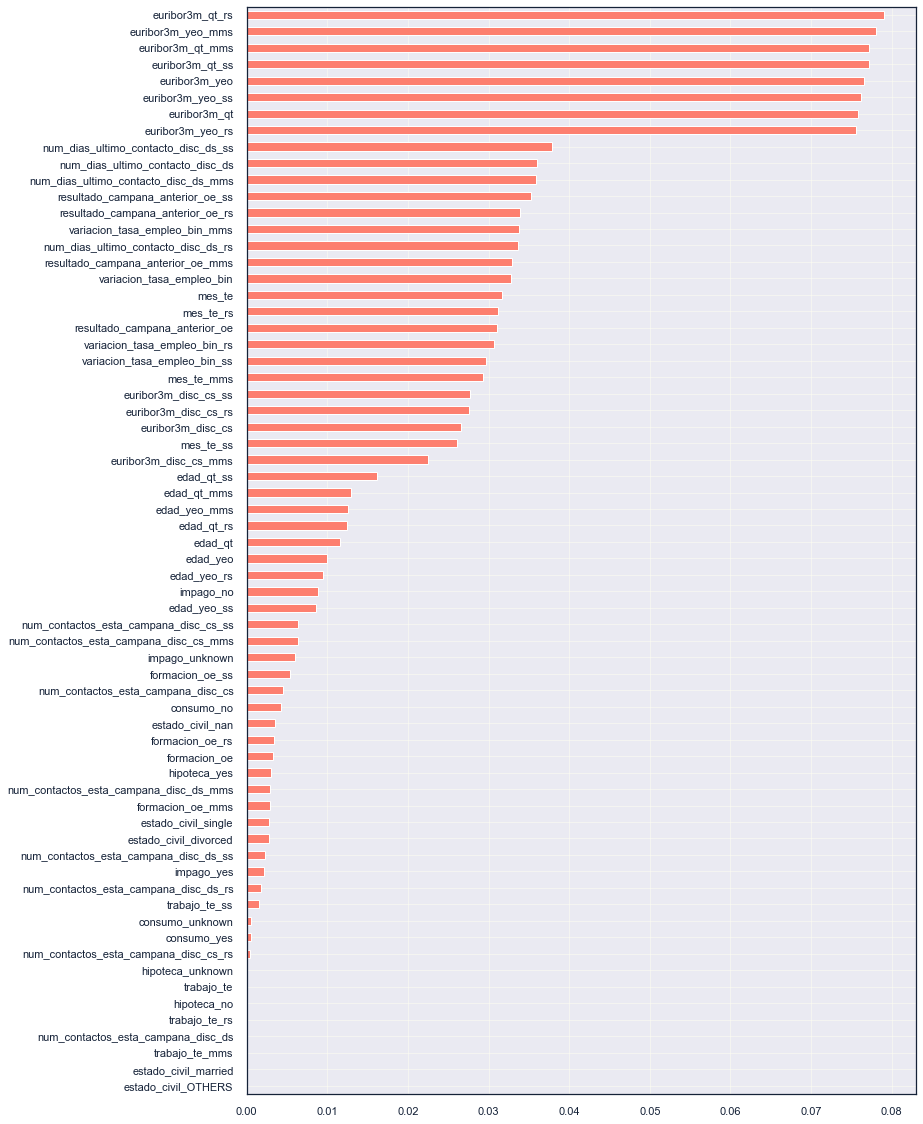

In [8]:
mutual_selector = mutual_info_classif(x,y)

fiser_tools.analytics.fis_preprocessing_ranking_mi(mutual_selector,x,modo='grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [9]:
posicion_variable_limite = 20

##### Extraer los nombres de las que entran

In [10]:
entran_mi = (fiser_tools.analytics.fis_preprocessing_ranking_mi(mutual_selector,x)
            .iloc[0:posicion_variable_limite]
            .variable)

##### Crear el dataframe con la selección

In [11]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [12]:
rfe = RFE(estimator = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc'))

#### Entrenar

In [13]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            gamma=None, gpu_id=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=None, reg_alpha=None, reg_lambda=None, ...))

##### Extraer los nombres de las que entran

In [14]:
entran_rfe = x.columns[rfe.support_]

#### Crear el dataframe con la selección

In [15]:
x_rfe = x[entran_rfe].copy()

In [17]:
fiser_tools.analytics.fis_preprocessing_ranking_rfe(x,rfe.support_)

variable  ranking_rfe
0                      estado_civil_OTHERS        False
30                              mes_te_mms        False
31  num_contactos_esta_campana_disc_ds_mms        False
64                             edad_yeo_ss        False
33    num_dias_ultimo_contacto_disc_ds_mms        False
..                                     ...          ...
20      num_contactos_esta_campana_disc_cs         True
21                       euribor3m_disc_cs         True
22               variacion_tasa_empleo_bin         True
24                                edad_yeo         True
47                    euribor3m_disc_cs_rs         True

[66 rows x 2 columns]

### Permutation Importance

#### Crear una función para mostrar el resultado

#### Instanciar y entrenar

In [19]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

#### Revisar la salida

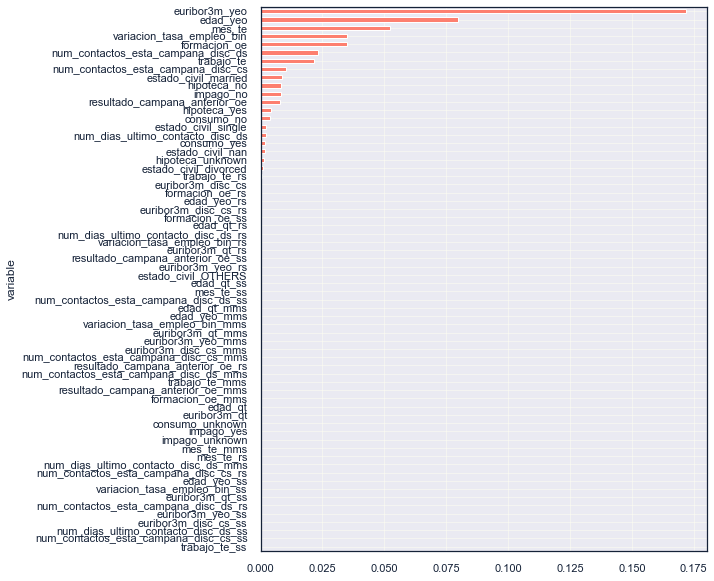

In [20]:
rank_per = fiser_tools.analytics.fis_preprocessing_ranking_per(x,permutacion)
fiser_tools.analytics.fis_preprocessing_ranking_per(x,permutacion,modo='grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [21]:
posicion_variable_limite = 6

##### Extraer los nombres de las que entran

In [22]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [23]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [24]:
x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
# x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

#### Calcular y revisar

##### Calcular

In [25]:
cor_finales = fiser_tools.analytics.fis_preprocessing_strong_corr(x_preseleccionado)

##### Revisar agregado

In [26]:
cor_finales.var1.value_counts()

euribor3m_yeo_rs                        5
euribor3m_qt_mms                        5
euribor3m_qt_ss                         5
euribor3m_yeo_mms                       5
variacion_tasa_empleo_bin_mms           3
resultado_campana_anterior_oe_ss        3
num_dias_ultimo_contacto_disc_ds        3
resultado_campana_anterior_oe_rs        3
euribor3m_qt                            3
variacion_tasa_empleo_bin               2
resultado_campana_anterior_oe_mms       2
euribor3m_qt_rs                         2
num_dias_ultimo_contacto_disc_ds_mms    2
euribor3m_yeo                           2
resultado_campana_anterior_oe           1
num_dias_ultimo_contacto_disc_ds_ss     1
euribor3m_yeo_ss                        1
num_dias_ultimo_contacto_disc_ds_rs     1
Name: var1, dtype: int64

##### Revisar detalle

In [27]:
cor_finales.head(50)

var1  \
289   num_dias_ultimo_contacto_disc_ds_rs   
27                      euribor3m_yeo_mms   
46                       euribor3m_qt_mms   
87                          euribor3m_yeo   
40                       euribor3m_qt_mms   
188      num_dias_ultimo_contacto_disc_ds   
66                        euribor3m_qt_ss   
208  num_dias_ultimo_contacto_disc_ds_mms   
1                         euribor3m_qt_rs   
23                      euribor3m_yeo_mms   
67                        euribor3m_qt_ss   
121                          euribor3m_qt   
65                        euribor3m_qt_ss   
22                      euribor3m_yeo_mms   
146                      euribor3m_yeo_rs   
140                      euribor3m_yeo_rs   
86                          euribor3m_yeo   
45                       euribor3m_qt_mms   
47                       euribor3m_qt_mms   
5                         euribor3m_qt_rs   
261         variacion_tasa_empleo_bin_mms   
153                      euribor3m_yeo_rs   
325             variacion_tasa_empleo_bin   
394         resultado_campana_anterior_oe   
192      num_dias_ultimo_contacto_disc_ds   
211  num_dias_ultimo_contacto_disc_ds_mms   
250      resultado_campana_anterior_oe_rs   
234      resultado_campana_anterior_oe_ss   
191      num_dias_ultimo_contacto_disc_ds   
171   num_dias_ultimo_contacto_disc_ds_ss   
248      resultado_campana_anterior_oe_rs   
260         variacion_tasa_empleo_bin_mms   
73                        euribor3m_qt_ss   
133                          euribor3m_qt   
322             variacion_tasa_empleo_bin   
275         variacion_tasa_empleo_bin_mms   
236      resultado_campana_anterior_oe_ss   
151                      euribor3m_yeo_rs   
111                      euribor3m_yeo_ss   
159                      euribor3m_yeo_rs   
39                      euribor3m_yeo_mms   
305     resultado_campana_anterior_oe_mms   
31                      euribor3m_yeo_mms   
71                        euribor3m_qt_ss   
220      resultado_campana_anterior_oe_ss   
300     resultado_campana_anterior_oe_mms   
243      resultado_campana_anterior_oe_rs   
55                       euribor3m_qt_mms   
131                          euribor3m_qt   

                                     var2      corr  
289      num_dias_ultimo_contacto_disc_ds  1.000000  
27                       euribor3m_yeo_rs  1.000000  
46                           euribor3m_qt  1.000000  
87                       euribor3m_yeo_rs  1.000000  
40                        euribor3m_qt_rs  1.000000  
188   num_dias_ultimo_contacto_disc_ds_ss  1.000000  
66                           euribor3m_qt  1.000000  
208   num_dias_ultimo_contacto_disc_ds_ss  1.000000  
1                       euribor3m_yeo_mms  0.866695  
23                        euribor3m_qt_ss  0.866695  
67                       euribor3m_yeo_rs  0.866695  
121                     euribor3m_yeo_mms  0.866695  
65                       euribor3m_yeo_ss  0.866695  
22                       euribor3m_qt_mms  0.866695  
146                          euribor3m_qt  0.866695  
140                       euribor3m_qt_rs  0.866695  
86                           euribor3m_qt  0.866695  
45                       euribor3m_yeo_ss  0.866695  
47                       euribor3m_yeo_rs  0.866695  
5                        euribor3m_yeo_ss  0.866695  
261                     euribor3m_yeo_mms  0.748783  
153         variacion_tasa_empleo_bin_mms  0.748783  
325                      euribor3m_yeo_ss  0.748783  
394   num_dias_ultimo_contacto_disc_ds_rs  0.743895  
192      resultado_campana_anterior_oe_rs  0.743895  
211      resultado_campana_anterior_oe_ss  0.743895  
250  num_dias_ultimo_contacto_disc_ds_mms  0.743895  
234   num_dias_ultimo_contacto_disc_ds_rs  0.743895  
191      resultado_campana_anterior_oe_ss  0.743895  
171      resultado_campana_anterior_oe_ss  0.743895  
248   num_dias_ultimo_contacto_disc_ds_ss  0.743895  
260                       euribor3m_qt_rs  0.662434  
73  

#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

In [28]:
a_eliminar_corr = ['euribor3m_qt', 'euribor3m_yeo_rs']

In [29]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [30]:
x_preseleccionado.columns.to_list()

['euribor3m_qt_rs',
 'euribor3m_yeo_mms',
 'euribor3m_qt_mms',
 'euribor3m_qt_ss',
 'euribor3m_yeo',
 'euribor3m_yeo_ss',
 'num_dias_ultimo_contacto_disc_ds_ss',
 'num_dias_ultimo_contacto_disc_ds',
 'num_dias_ultimo_contacto_disc_ds_mms',
 'resultado_campana_anterior_oe_ss',
 'resultado_campana_anterior_oe_rs',
 'variacion_tasa_empleo_bin_mms',
 'num_dias_ultimo_contacto_disc_ds_rs',
 'resultado_campana_anterior_oe_mms',
 'variacion_tasa_empleo_bin',
 'mes_te',
 'mes_te_rs',
 'resultado_campana_anterior_oe']

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [31]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [32]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [33]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)